In [125]:
import pandas as pd
data = pd.read_csv(r"C:\Users\OVERMARS\Downloads\Nouveau dossier\REGLEMENTS_CARTES_PREPAYEES_FAST_FOOD-_1_.csv")
print(data.head())  
print(data.info())  
print(data.columns)
#verifier les valeurs manquante
missing_values = data.isnull().sum()
print("valeurs manquantes par colonne :")
print(missing_values)
#fill missing values with the mean for numeric columns
data['Montant_Rgl'].fillna(data['Montant_Rgl'].mean(), inplace=True)
data['Solde_CPP'].fillna(data['Solde_CPP'].mean(), inplace=True)
#gerrer les champs de date et d heure
data['Date_Règlement'] = pd.to_datetime(data['Date_Règlement'], errors='coerce')  
data['Heure_Règlement'] = pd.to_datetime(data['Heure_Règlement'], format='%H:%M:%S', errors='coerce').dt.time 
#verifier la conversion
print(data[['Date_Règlement', 'Heure_Règlement']].head())


   ID_Règlement  ID_Operation Date_Règlement Heure_Règlement        Paiement  \
0        287967     700877295     2024-02-29        08:07:37  Carte prépayée   
1        287983     700877305     2024-02-29        08:17:54  Carte prépayée   
2        287994     700877312     2024-02-29        08:23:33  Carte prépayée   
3        282957     700874995     2024-02-22        11:19:17  Carte prépayée   
4        282972     700874999     2024-02-22        11:31:14  Carte prépayée   

   Référence  Montant_Rgl  Montant_Versé  Montant_Rst ID_Client  ...  \
0        NaN         13.5           13.5          0.0  CLT10001  ...   
1        NaN          8.0            8.0          0.0  CLT10001  ...   
2        NaN         20.0           20.0          0.0  CLT10001  ...   
3        NaN         87.0           87.0          0.0  CLT10001  ...   
4        NaN          5.0            5.0          0.0  CLT10001  ...   

  Bénéficiaire_CPP Solde_CPP ID_Restaurant  \
0          MOUMOUN    952.00      RST100

C:\Users\OVERMARS\AppData\Local\Temp\ipykernel_5692\199263510.py:11: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\OVERMARS\AppData\Local\Temp\ipykernel_5692\199263510.py:12: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

  Date_Règlement Heure_Règlement
0     2024-02-29        08:07:37
1     2024-02-29        08:17:54
2     2024-02-29        08:23:33
3     2024-02-22        11:19:17
4     2024-02-22        11:31:14


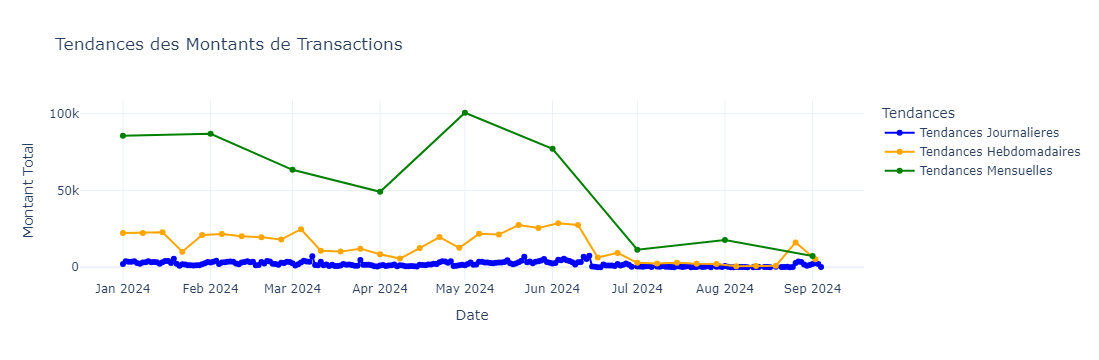

In [107]:
import plotly.graph_objects as go
import plotly.express as px
#gerer les champs de date et d'heure
data['Date_Règlement'] = pd.to_datetime(data['Date_Règlement'], errors='coerce')  
data['Montant_Rgl'] = pd.to_numeric(data['Montant_Rgl'], errors='coerce')  
data = data.dropna(subset=['Date_Règlement', 'Montant_Rgl'])  
#calcul des tendances
 #tendance journaliere
daily_trends = data.groupby('Date_Règlement')['Montant_Rgl'].sum().reset_index()
#tendance hebdomadaire
data['Semaine'] = data['Date_Règlement'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_trends = data.groupby('Semaine')['Montant_Rgl'].sum().reset_index()
#tendance mensuelle
data['Mois'] = data['Date_Règlement'].dt.to_period('M').apply(lambda r: r.start_time)
monthly_trends = data.groupby('Mois')['Montant_Rgl'].sum().reset_index()
#interactive line chart
fig = go.Figure()
#daily trends
fig.add_trace(go.Scatter(x=daily_trends['Date_Règlement'], y=daily_trends['Montant_Rgl'], mode='lines+markers', name='Tendances Journalieres', line=dict(color='blue')))
#weekly trends
fig.add_trace(go.Scatter(x=weekly_trends['Semaine'],  y=weekly_trends['Montant_Rgl'],  mode='lines+markers',  name='Tendances Hebdomadaires', line=dict(color='orange')))
#monthly trends
fig.add_trace(go.Scatter(x=monthly_trends['Mois'],   y=monthly_trends['Montant_Rgl'],  mode='lines+markers',  name='Tendances Mensuelles', line=dict(color='green')))
#update layout
fig.update_layout(title='Tendances des Montants de Transactions', xaxis_title='Date', yaxis_title='Montant Total', legend_title='Tendances',template='plotly_white')

fig.show()


Aperçu des soldes journaliers :
   Date_Règlement   Solde_CPP
0     2024-01-01  467.240260
1     2024-01-02  484.587836
2     2024-01-03  576.126336
3     2024-01-04  421.185064
4     2024-01-05  495.011348


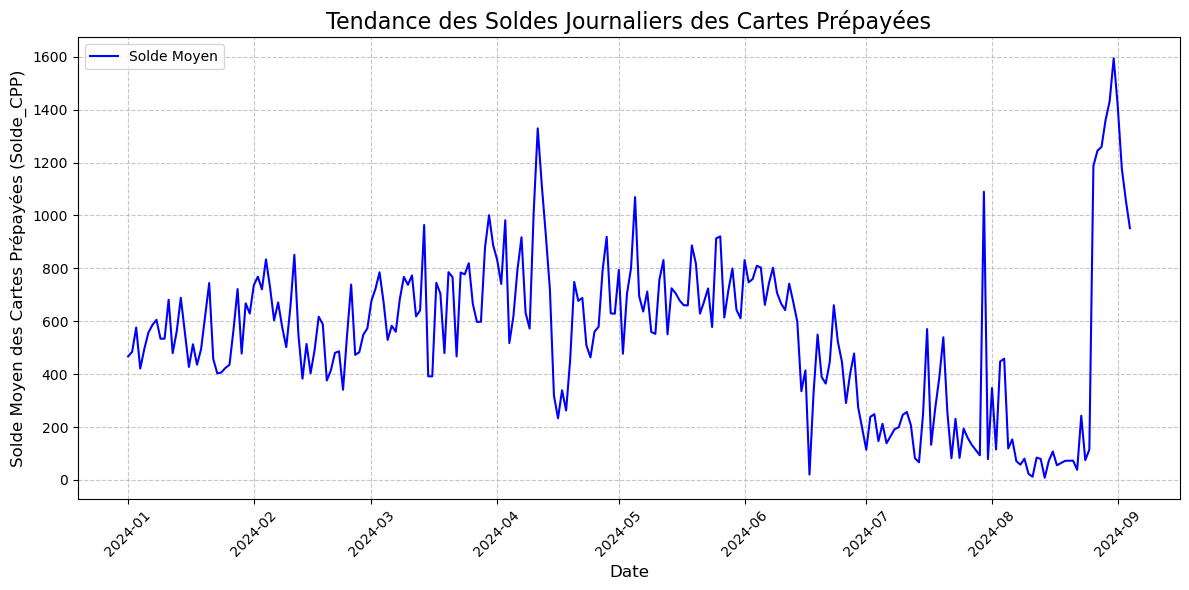

<Figure size 640x480 with 0 Axes>

In [64]:
import matplotlib.pyplot as plt
#assurer Date_reglement est bien au format datetime
data['Date_Règlement'] = pd.to_datetime(data['Date_Règlement'], errors='coerce')
#verifier si la colonne Solde_CPP est presente
if 'Solde_CPP' in data.columns and 'Date_Règlement' in data.columns:
    #conversion de la colonne 'Solde_CPP' en type numérique, en forçant les erreurs a NaN
    data['Solde_CPP'] = pd.to_numeric(data['Solde_CPP'], errors='coerce')   
    #verifier il y a des valeurs nulles apres conversion
    null_values = data['Solde_CPP'].isnull().sum()
    if null_values > 0:
        print(f"valeurs nulles apres conversion : {null_values}")
    #groupement par date et calcul de la moyenne des soldes des cartes prepayees
    solde_journalier = data.groupby('Date_Règlement')['Solde_CPP'].mean().reset_index()
    #verifier le resultat du groupement
    print("Aperçu des soldes journaliers :\n", solde_journalier.head())
    #visualisation de la tendance des soldes au fil du temps
    plt.figure(figsize=(12, 6))
    plt.plot(solde_journalier['Date_Règlement'], solde_journalier['Solde_CPP'], 
              color='blue', label='Solde Moyen')
    #ajouter un titre et des etiquettes aux axes
    plt.title('Tendance des Soldes Journaliers des Cartes Prépayées', fontsize=16)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Solde Moyen des Cartes Prépayées (Solde_CPP)', fontsize=12)
    #rotation des etiquettes de laxe des X pour les rendre lisibles
    plt.xticks(rotation=45)
    #ajouter une grille pour la lisibilite
    plt.grid(True, linestyle='--', alpha=0.7)
    #afficher la legende
    plt.legend()
    #affichage du graphique
    plt.tight_layout()
    plt.show()
else:
    missing_cols = []
    if 'Solde_CPP' not in data.columns:
        missing_cols.append('Solde_CPP')
    if 'Date_Règlement' not in data.columns:
        missing_cols.append('Date_Règlement')
    print(f"erreur : Les colonnes suivantes sont manquantes dans les donnees : {', '.join(missing_cols)}")
plt.savefig('mon_graphique.png')

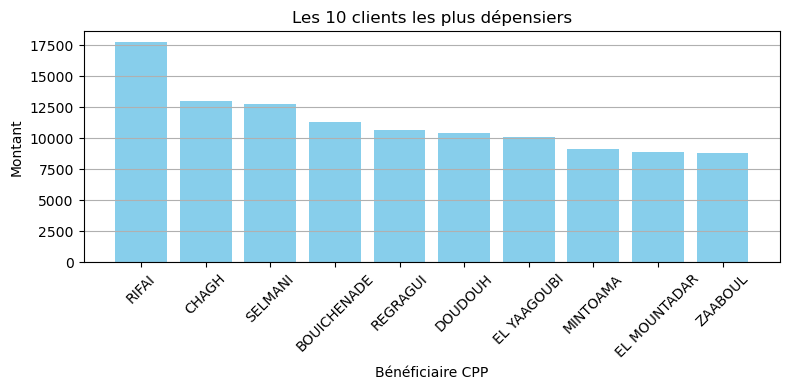

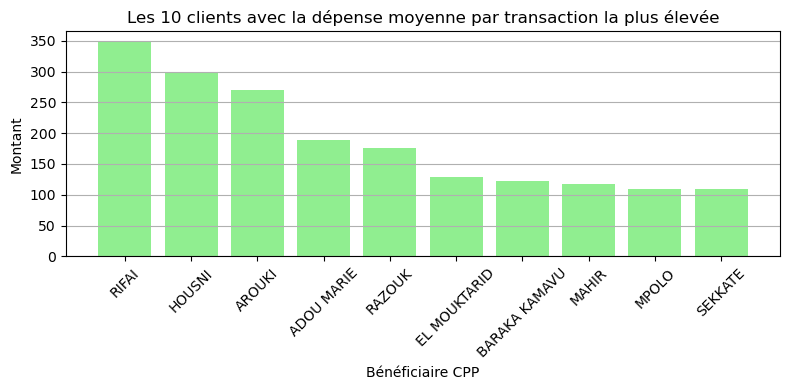

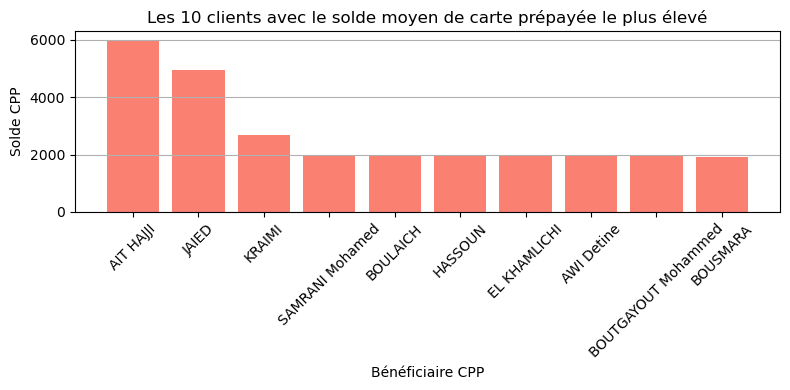

In [128]:
#calculer les 10 clients les plus depensiers
top_clients = df.groupby('Bénéficiaire_CPP')['Montant_Rgl'].sum().sort_values(ascending=False).head(10).reset_index()
top_beneficiaires = top_clients['Bénéficiaire_CPP']
#filtrer le DataFrame initial pour ne conserver que les lignes correspondant a ces beneficiaires
df_filtered = df[df['Bénéficiaire_CPP'].isin(top_beneficiaires)]
#calculer la dépense moyenne par transaction pour les 10 clients
avg_spent_per_client = df.groupby('Bénéficiaire_CPP')['Montant_Rgl'].mean().sort_values(ascending=False).head(10).reset_index()
#analyser les tendances du solde des cartes prépayées pour les clients les plus dépensiers
top_clients_soldes = df_filtered.groupby('Bénéficiaire_CPP')['Solde_CPP'].mean().sort_values(ascending=False).head(10).reset_index()
#identifier les plus gros depensiers
top_clients = data.groupby('Bénéficiaire_CPP')['Montant_Rgl'].sum().reset_index()
top_clients = top_clients.sort_values(by='Montant_Rgl', ascending=False).head(10)
#calculer la dépense moyenne par transaction pour chaque client
avg_spent_per_client = data.groupby('Bénéficiaire_CPP').agg({'Montant_Rgl': ['mean', 'count']})
avg_spent_per_client.columns = ['Moyenne_Dépense', 'Nombre_Transactions']
avg_spent_per_client = avg_spent_per_client.sort_values(by='Moyenne_Dépense', ascending=False).head(10)
#analyser les tendances du solde des cartes prepayees
# Supposons que vous avez une colonne 'Solde_CPP' dans vos donnees
top_clients_soldes = data.groupby('Bénéficiaire_CPP')['Solde_CPP'].mean().reset_index()
top_clients_soldes = top_clients_soldes.sort_values(by='Solde_CPP', ascending=False).head(10)
#creer des graphiques en barres
e#graphe pour les 10 clients les plus depensiers
plt.figure(figsize=(8, 4))
plt.bar(top_clients['Bénéficiaire_CPP'], top_clients['Montant_Rgl'], color='skyblue')
plt.title('Les 10 clients les plus dépensiers')
plt.xlabel('Bénéficiaire CPP')
plt.ylabel('Montant')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
#graphe pour les 10 clients avec la depense moyenne par transaction la plus elevee
plt.figure(figsize=(8, 4))
plt.bar(avg_spent_per_client.index, avg_spent_per_client['Moyenne_Dépense'], color='lightgreen')
plt.xticks(ticks=avg_spent_per_client.index, labels=avg_spent_per_client.index, rotation=45)
plt.title('Les 10 clients avec la dépense moyenne par transaction la plus élevée')
plt.xlabel('Bénéficiaire CPP')
plt.ylabel('Montant')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
#graphe pour les 10 clients avec le solde moyen de carte prépayée le plus eleve
plt.figure(figsize=(8, 4))
plt.bar(top_clients_soldes['Bénéficiaire_CPP'], top_clients_soldes['Solde_CPP'], color='salmon')
plt.title('Les 10 clients avec le solde moyen de carte prépayée le plus élevé')
plt.xlabel('Bénéficiaire CPP')
plt.ylabel('Solde CPP')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Nombre de clients avec un solde de carte à zéro: 0


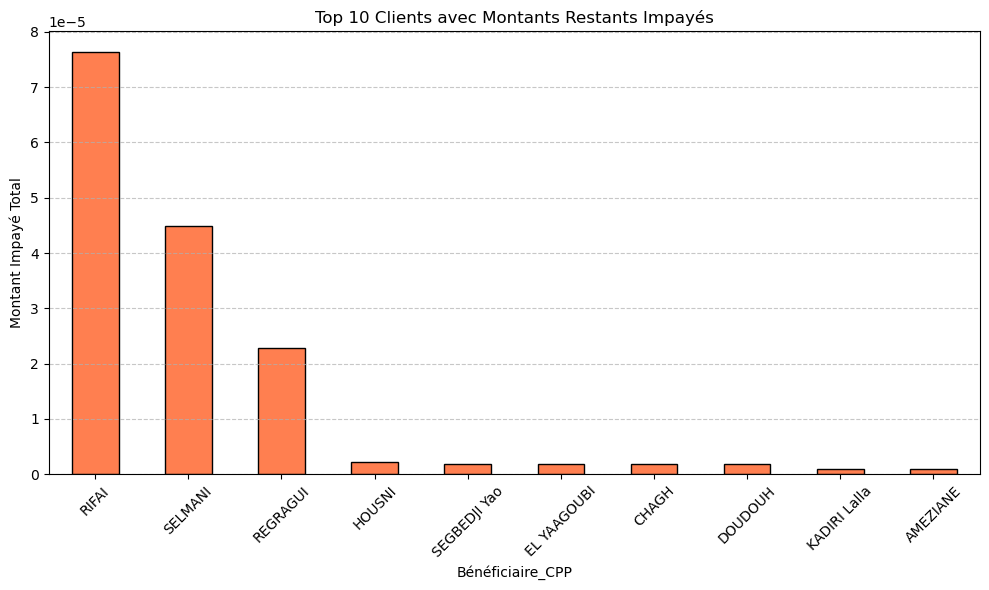

In [38]:
#supprimer les lignes avec des valeurs NaN dans les colonnes pertinentes
data = data.dropna(subset=['Montant_Rst', 'Solde_CPP', 'Bénéficiaire_CPP'])
#analyse des montants restants impayes et des soldes a zero
#transactions avec montant impaye (Montant_Rst > 0)
montants_impayes = data[data['Montant_Rst'] > 0]
#grouper par client et calculer le montant impaye total
impayes_par_client = montants_impayes.groupby('Bénéficiaire_CPP')['Montant_Rst'].sum().sort_values(ascending=False)
#transactions avec solde de carte a zero (Solde_CPP == 0)
solde_zero = data[data['Solde_CPP'] == 0]
#afficher le nombre de clients avec solde a zero
nombre_clients_zero_solde = solde_zero['Bénéficiaire_CPP'].nunique()
print(f"Nombre de clients avec un solde de carte a zero: {nombre_clients_zero_solde}")
#visualisation des clients avec les montants impayes les plus eleves
plt.figure(figsize=(10, 6))
top_impayes = impayes_par_client.head(10)
top_impayes.plot(kind='bar', title='Top 10 Clients avec Montants Restants Impayes', color='coral', edgecolor='black')
plt.xlabel('Bénéficiaire_CPP')
plt.ylabel('Montant Impayé Total')
#afficher le graphique
plt.xticks(rotation=45) 
plt.tight_layout()  
plt.grid(axis='y', linestyle='--', alpha=0.7)  
plt.show()


   ID_Règlement  ID_Operation Date_Règlement Heure_Règlement        Paiement  \
0        287967     700877295     2024-02-29        08:07:37  Carte prépayée   
1        287983     700877305     2024-02-29        08:17:54  Carte prépayée   
2        287994     700877312     2024-02-29        08:23:33  Carte prépayée   
3        282957     700874995     2024-02-22        11:19:17  Carte prépayée   
4        282972     700874999     2024-02-22        11:31:14  Carte prépayée   

   Référence  Montant_Rgl  Montant_Versé  Montant_Rst ID_Client  ...  \
0        NaN         13.5           13.5          0.0  CLT10001  ...   
1        NaN          8.0            8.0          0.0  CLT10001  ...   
2        NaN         20.0           20.0          0.0  CLT10001  ...   
3        NaN         87.0           87.0          0.0  CLT10001  ...   
4        NaN          5.0            5.0          0.0  CLT10001  ...   

  Bénéficiaire_CPP Solde_CPP ID_Restaurant  \
0          MOUMOUN    952.00      RST100

C:\Users\OVERMARS\AppData\Local\Temp\ipykernel_5692\3890345472.py:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




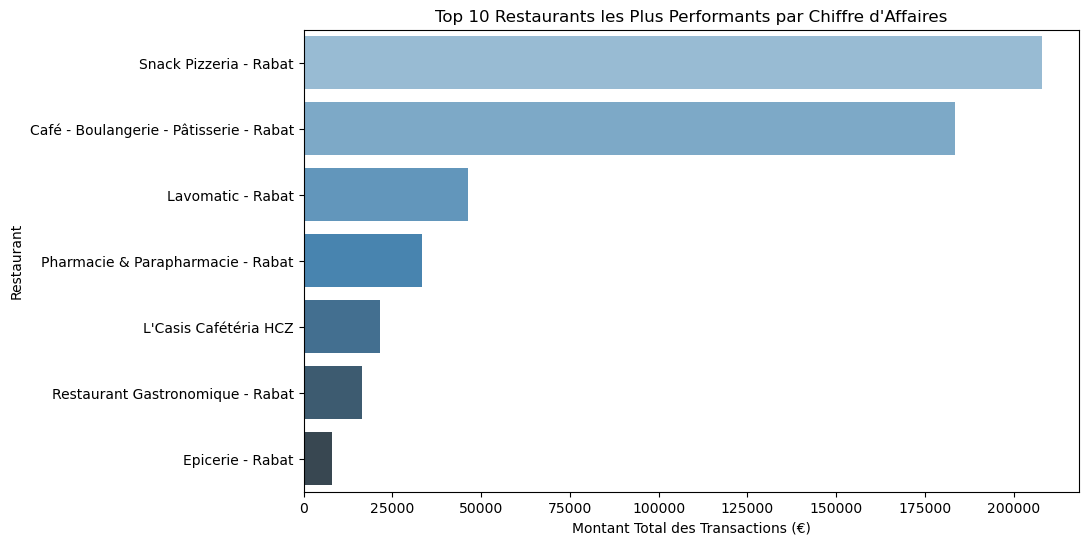

C:\Users\OVERMARS\AppData\Local\Temp\ipykernel_5692\3890345472.py:23: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




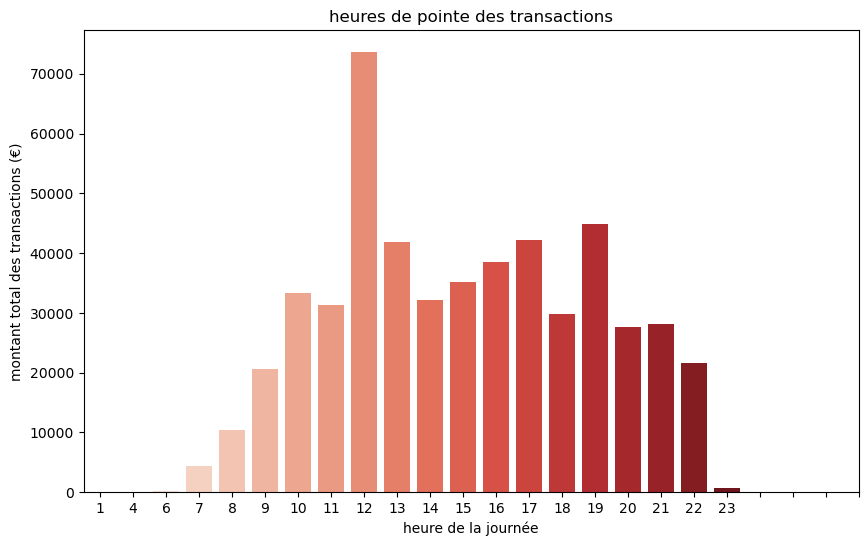

In [62]:
import seaborn as sns
#verifier les premieres lignes pour sassurer que les donnees sont correctement chargees
print(data.head())
#convertir la colonne 'Heure_Règlement' en format datetime pour extraire uniquement l heure
data['Heure_Règlement'] = pd.to_datetime(data['Heure_Règlement'], format='%H:%M:%S').dt.hour
#analyse des Restaurants les Plus Performants
#grouper les transactions par restaurant et calculer le revenu total
performing_restaurants = data.groupby('Restaurant')['Montant_Rgl'].sum().reset_index()
#trier les restaurants par revenu total
performing_restaurants = performing_restaurants.sort_values(by='Montant_Rgl', ascending=False).head(10)  
#creer un graphique en barres des restaurants les plus performants
plt.figure(figsize=(10, 6))
sns.barplot(x='Montant_Rgl', y='Restaurant', data=performing_restaurants, palette='Blues_d')
plt.title('Top 10 Restaurants les Plus Performants par Chiffre d\'Affaires')
plt.xlabel('Montant Total des Transactions (€)')
plt.ylabel('Restaurant')
plt.show()
#analyse des Heures de Pointe
#grouper les transactions par heure et calculer le montant total des transactions
peak_hours = data.groupby('Heure_Règlement')['Montant_Rgl'].sum().reset_index()
#creer un graphique en barres des heures de pointe
plt.figure(figsize=(10, 6))
sns.barplot(x='Heure_Règlement', y='Montant_Rgl', data=peak_hours, palette='Reds')
plt.title('heures de pointe des transactions')
plt.xlabel('heure de la journée')
plt.ylabel('montant total des transactions (€)')
plt.xticks(range(24))  
plt.show()


   ID_Règlement  ID_Operation Date_Règlement Heure_Règlement        Paiement  \
0        287967     700877295     2024-02-29        08:07:37  Carte prépayée   
1        287983     700877305     2024-02-29        08:17:54  Carte prépayée   
2        287994     700877312     2024-02-29        08:23:33  Carte prépayée   
3        282957     700874995     2024-02-22        11:19:17  Carte prépayée   
4        282972     700874999     2024-02-22        11:31:14  Carte prépayée   

   Référence  Montant_Rgl  Montant_Versé  Montant_Rst ID_Client  ...  \
0        NaN         13.5           13.5          0.0  CLT10001  ...   
1        NaN          8.0            8.0          0.0  CLT10001  ...   
2        NaN         20.0           20.0          0.0  CLT10001  ...   
3        NaN         87.0           87.0          0.0  CLT10001  ...   
4        NaN          5.0            5.0          0.0  CLT10001  ...   

  Bénéficiaire_CPP Solde_CPP ID_Restaurant  \
0          MOUMOUN    952.00      RST100

C:\Users\OVERMARS\AppData\Local\Temp\ipykernel_24572\2220500200.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nombre_Anomalies', y='Prenom User', data=anomalies_per_client.sort_values(by='Nombre_Anomalies', ascending=False).head(10), palette='Blues_d')


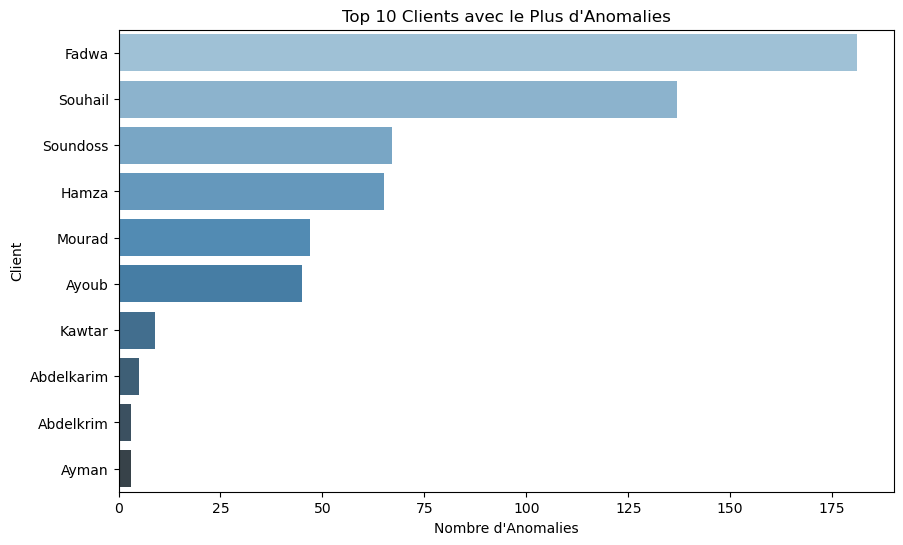

C:\Users\OVERMARS\AppData\Local\Temp\ipykernel_24572\2220500200.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Nombre_Anomalies', y='Restaurant', data=anomalies_per_restaurant.sort_values(by='Nombre_Anomalies', ascending=False).head(10), palette='Reds')


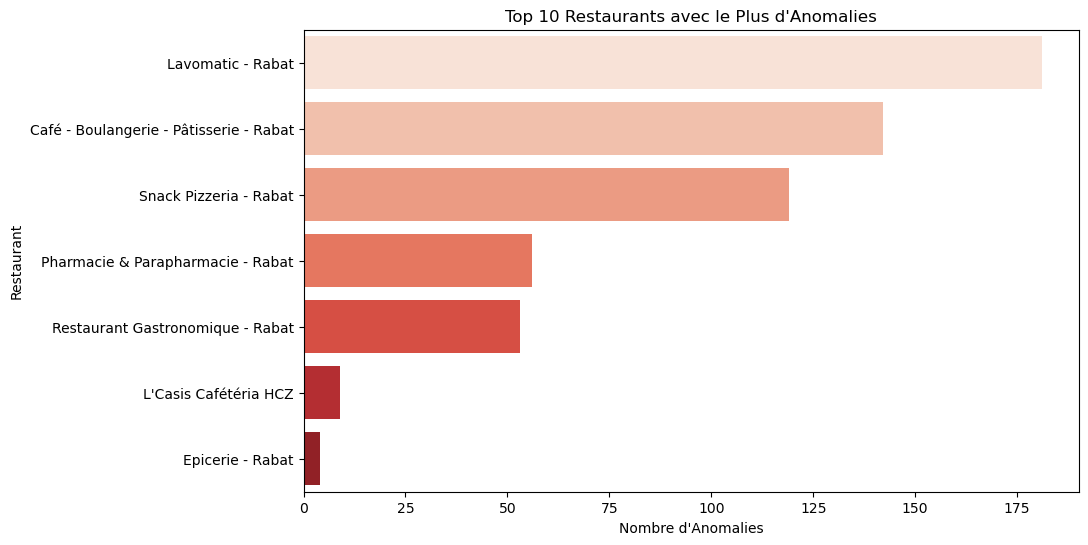

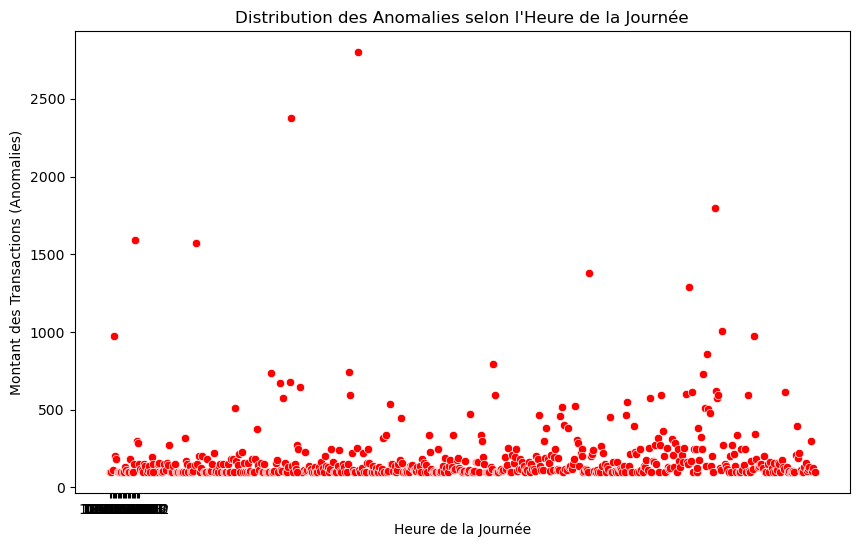

In [63]:
import numpy as np
#calcul de l'IQR pour Detecter les Anomalies
#calculer Q1 (25e percentile) et Q3 (75e percentile) pour 'Montant_Rgl'
Q1 = data['Montant_Rgl'].quantile(0.25)
Q3 = data['Montant_Rgl'].quantile(0.75)
IQR = Q3 - Q1
#definir les bornes pour identifier les outliers (anomalies)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#filtrer les anomalies (montants des transactions en dehors des bornes definies)
anomalies = data[(data['Montant_Rgl'] < lower_bound) | (data['Montant_Rgl'] > upper_bound)]
#verifier les anomalies detectees
print("Anomalies detectees :", anomalies.shape[0])
print(anomalies.head())
#groupement des Anomalies:
# Grouper les anomalies par client, restaurant et heure de règlement pour identifier les motifs
anomalies_per_client = anomalies.groupby('Prenom User').size().reset_index(name='Nombre_Anomalies')
anomalies_per_restaurant = anomalies.groupby('Restaurant').size().reset_index(name='Nombre_Anomalies')
anomalies_per_hour = anomalies.groupby('Heure_Règlement').size().reset_index(name='Nombre_Anomalies')
#visualisation des Anomalies 
#graphique en barres pour les clients avec le plus d'anomalies
plt.figure(figsize=(10, 6))
sns.barplot(x='Nombre_Anomalies', y='Prenom User', data=anomalies_per_client.sort_values(by='Nombre_Anomalies', ascending=False).head(10), palette='Blues_d')
plt.title('top 10 clients avec le Plus d\'Anomalies')
plt.xlabel('Nombre d\'Anomalies')
plt.ylabel('Client')
plt.show()
#graphique en barres pour les restaurants avec le plus danomalies 
plt.figure(figsize=(10, 6))
sns.barplot(x='Nombre_Anomalies', y='Restaurant', data=anomalies_per_restaurant.sort_values(by='Nombre_Anomalies', ascending=False).head(10), palette='Reds')
plt.title('Top 10 Restaurants avec le Plus d\'Anomalies')
plt.xlabel('Nombre d\'Anomalies')
plt.ylabel('Restaurant')
plt.show()
#scatter plot pour les anomalies selon l'heure de la journee
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Heure_Règlement', y='Montant_Rgl', data=anomalies, color='red')
plt.title('Distribution des Anomalies selon l\'Heure de la Journee')
plt.xlabel('Heure de la Journée')
plt.ylabel('Montant des Transactions (Anomalies)')
plt.xticks(range(24)) 
plt.show()


C:\Users\OVERMARS\AppData\Local\Temp\ipykernel_5692\1376568925.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




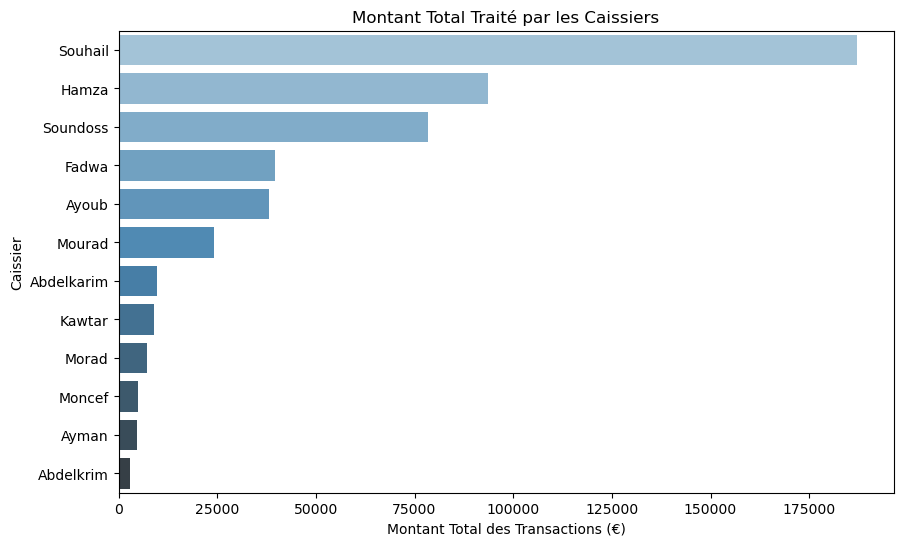

C:\Users\OVERMARS\AppData\Local\Temp\ipykernel_5692\1376568925.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




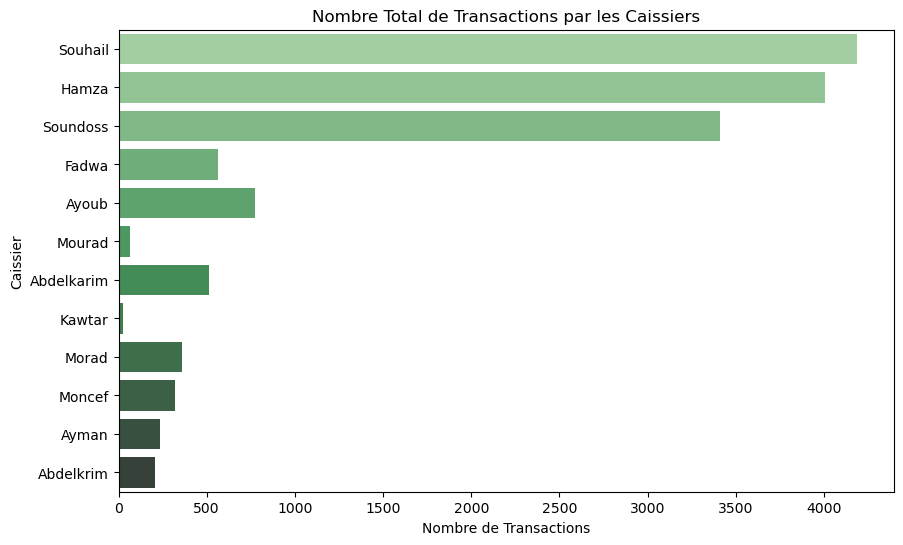

In [102]:
#analyse des Performances des Caissiers 
#grouper les données par caissier et calculer le montant total des transactions
caissier_performance = data.groupby('Prenom User').agg(
    total_montant=pd.NamedAgg(column='Montant_Rgl', aggfunc='sum'),
    total_transactions=pd.NamedAgg(column='Montant_Rgl', aggfunc='count')
).reset_index()
#trier les donnees par le montant total traite
caissier_performance = caissier_performance.sort_values(by='total_montant', ascending=False)
#visualisation des Performances des Caissiers
#graphique en barres pour le montant total traite par chaque caissier
plt.figure(figsize=(10, 6))
sns.barplot(x='total_montant', y='Prenom User', data=caissier_performance, palette='Blues_d')
plt.title('Montant Total Traité par les Caissiers')
plt.xlabel('Montant Total des Transactions (€)')
plt.ylabel('Caissier')
plt.show()
#graphique en barres pour le nombre total de transactions par chaque caissier
plt.figure(figsize=(10, 6))
sns.barplot(x='total_transactions', y='Prenom User', data=caissier_performance, palette='Greens_d')
plt.title('Nombre Total de Transactions par les Caissiers')
plt.xlabel('Nombre de Transactions')
plt.ylabel('Caissier')
plt.show()


correlation entre le solde des cartes prepayees et les depenses des clients :
             Solde_CPP  Montant_Rgl
Solde_CPP      1.00000      0.17948
Montant_Rgl    0.17948      1.00000


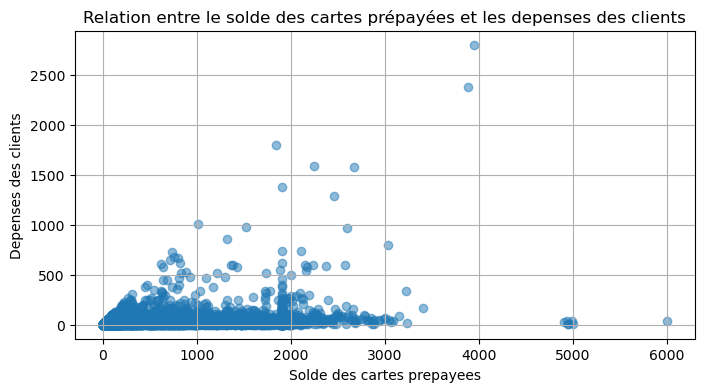

Dépenses et soldes par bénéficiaire :
        Bénéficiaire_CPP    Solde_CPP  Montant_Rgl
0                  AABID    72.900000   259.500000
1                  AABIL  1295.144000  2824.900002
2                  AARAB   924.408095  7205.000000
3              AARIBECHE    14.500000    28.000000
4                  AAYLA   114.261250   184.625000
..                   ...          ...          ...
850            meryem el    92.375000   108.000000
851               nassri    61.253333    33.740000
852  nouhaila alaoui ait    39.750000    36.000000
853               rhazal   147.510000    30.000000
854                sylla    55.666667    97.000000

[855 rows x 3 columns]


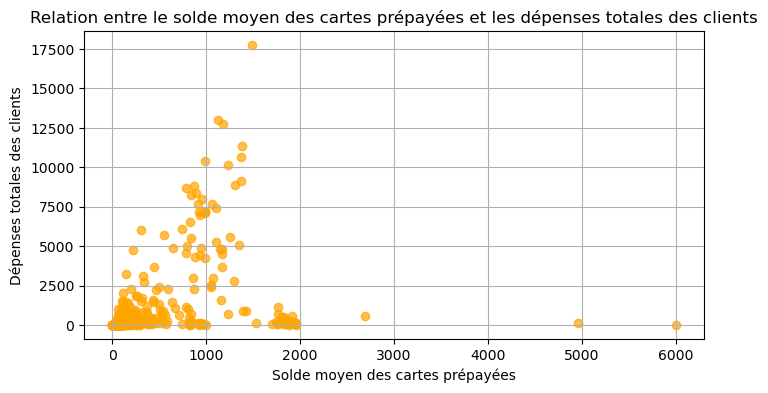

In [101]:
#etape 1 :analyse de la relation entre le solde des cartes prepayees et les depenses des clients
correlation = data[['Solde_CPP', 'Montant_Rgl']].corr()
print("correlation entre le solde des cartes prepayees et les depenses des clients :")
print(correlation)
#visualiser la relation avec un nuage de points
plt.figure(figsize=(8, 4))
plt.scatter(data['Solde_CPP'], data['Montant_Rgl'], alpha=0.5)
plt.xlabel('Solde des cartes prepayees')
plt.ylabel('Depenses des clients')
plt.title('Relation entre le solde des cartes prépayées et les depenses des clients')
plt.grid()
plt.show()
#etape 2 :analyse de la relation en fonction du client
client_spending_balance = data.groupby('Bénéficiaire_CPP').agg({'Solde_CPP': 'mean', 'Montant_Rgl': 'sum'  }).reset_index()
print("Dépenses et soldes par bénéficiaire :")
print(client_spending_balance)
#visualiser la relation pour les clients
plt.figure(figsize=(8, 4))
plt.scatter(client_spending_balance['Solde_CPP'], client_spending_balance['Montant_Rgl'], color='orange', alpha=0.7)
plt.xlabel('Solde moyen des cartes prépayées')
plt.ylabel('Dépenses totales des clients')
plt.title('Relation entre le solde moyen des cartes prépayées et les dépenses totales des clients')
plt.grid()
plt.show()


In [ ]:
c